In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN


In [2]:
df = pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
#convert dates to datetime
df['dteday'] = pd.to_datetime(df['dteday'])
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
#plot kmeans and scatter plot for x and y variables
def plot_kmeans(k,df,xcol,ycol,labelling):
    #application of kmeans
    X = df[[xcol,ycol]]
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    predictions = kmeans.predict(X)

    #comparing kmeans result to plotting grouping by labelling variable
    fig, axs = plt.subplots(1,2, figsize=(15,4))

    scatter = axs[0].scatter(X[xcol], X[ycol], c = predictions, label = predictions)
    axs[0].set_title('KMeans')
    legend1 = axs[0].legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    axs[0].add_artist(legend1)
    axs[0].set_xlabel(xcol)
    axs[0].set_ylabel(ycol)

    scatter = axs[1].scatter(X[xcol], X[ycol], c = df[labelling], label = df[labelling])
    axs[1].set_title('Scatter')
    legend1 = axs[1].legend(*scatter.legend_elements(), loc="upper right", title=labelling)
    axs[1].add_artist(legend1)
    axs[1].set_xlabel(xcol)
    axs[1].set_ylabel(ycol)
    
#function plots performance of kmeans for different values of k
def elbow_method(X,title):
    cost =[]
    for i in range(1, 11):
        KM = KMeans(n_clusters = i, max_iter = 500)
        KM.fit(X)

        # calculates squared error
        # for the clustered points
        cost.append(KM.inertia_)    

    # plot the cost against K values
    plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
    plt.title(title)
    plt.xlabel("Value of K")
    plt.ylabel("Squared Error (Cost)")
    plt.show() # clear the plot

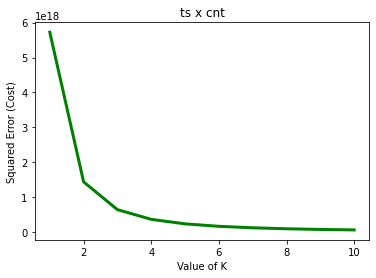

In [7]:
#create timestamp colum based on datetime column
df['ts'] = df['dteday'].values.astype(np.int64) // 10 ** 9
elbow_method(df[['ts','cnt']], 'ts x cnt')

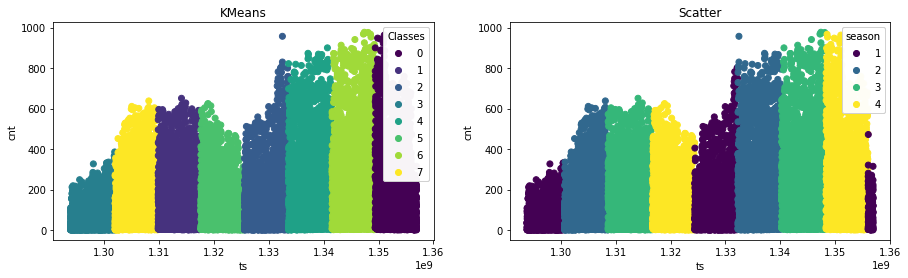

In [8]:
plot_kmeans(8,df,'ts','cnt','season')

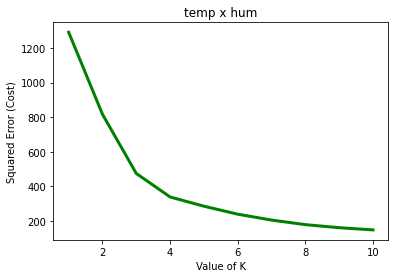

In [9]:
elbow_method(df[['temp','hum']], 'temp x hum')

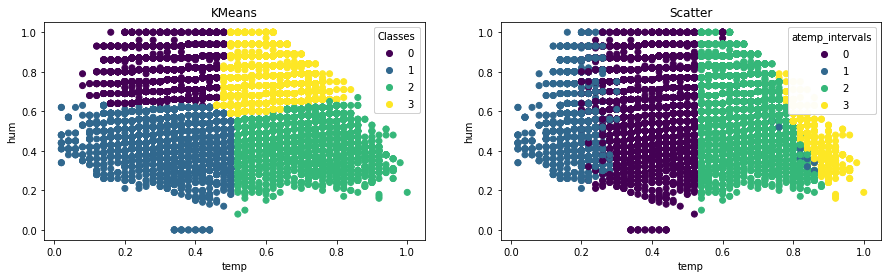

In [12]:
df['atemp_intervals'] = pd.cut(df['atemp'], 4)
df['atemp_intervals'] = df['atemp_intervals'].replace({
    df['atemp_intervals'].unique()[0] : 0,
    df['atemp_intervals'].unique()[1] : 1,
    df['atemp_intervals'].unique()[2] : 2,
    df['atemp_intervals'].unique()[3] : 3,
})
plot_kmeans(4,df,'temp','hum','atemp_intervals')